# Midterm 1: Take-home portion

## Part 1: Baby Names

In [105]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import truediv 
from string import digits

In [35]:
babys = pd.read_csv('babynames.csv')

### 1. In the song “A Boy Named Sue” country singer Johnny Cash famously told the story of a boy toughened in life by being given a girl’s name. Is being a boy named Sue actually a rare ocurrence ?

    (a) Compute the ratio of the total number of girls named Sue and the total number of boys named Sue. How much more common is Sue as name for girls than as a name for boys?

    (b) Compute the ratio of the total number of girl’s named Sue and the total number of boy’s named Sue by year. Plot this ratio by year. Johnny Cash’s song was released in 1969. Do you see any changes in the ratio around that time (or any other time)?
    
#### *** Overall, I would say that the name 'Sue' for a boy is in fact a rare occurance. ***

### 1(a) Compute the ratio of the total number of girls named Sue and the total number of boys named Sue. How much more common is Sue as name for girls than as a name for boys?

    - By taking the proportions of the name 'Sue' by gender, we found that the sum of the proportions for females  named 'Sue' was about .11, while the proportion for men named 'Sue' was 0.0003, making it about 367 times more  likely for a female to be named Sue than a male.

In [36]:
sue_df = babys[babys['name'] == 'Sue']

In [37]:
sue_df.groupby(['sex'])['prop'].sum().reset_index()

,sex,prop
0,F,0.110445
1,M,0.000327


### 1(b) Compute the ratio of the total number of girl’s named Sue and the total number of boy’s named Sue by year. Plot this ratio by year. Johnny Cash’s song was released in 1969. Do you see any changes in the ratio around that time (or any other time)?
    
    - By observing the plot, there does not appear to be any kind of increase in the number of boys named 'Sue'    after the song release in 1969. The most common timeframe that there appears to be an influx of boys named Sue is between the years 1930 and 1950.

In [5]:
props_year = pd.DataFrame(sue_df.groupby(['year','sex'])['prop'].sum()).reset_index()

<BarContainer object of 52 artists>

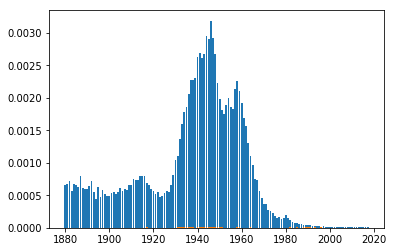

In [6]:
sue_M = sue_df[sue_df['sex'] == 'M']
sue_F = sue_df[sue_df['sex'] == 'F']
plt.bar(sue_F['year'], sue_F['prop'])
plt.bar(sue_M['year'], sue_M['prop'])

### 2. Repeat problem (1) with your own name? Is your name more popular for females than for males? Is there any change in the gender preference ratio over time?

    - The name Cameron is much more of a common occurance for boys than it is for girls. I have always thought that 'Cameron' was pretty evenly distibutred amongst the two genders, but this data shows that it is approximately 9.65 times more likely for boys to have the name than girls. 
    
    - The name was most popular around the years 1995-2000 (I was born in 1995) and has slowly started to decrease in popularity since. The trends are about equal for boys and girls, both increasing and decreasing around the same times.

In [7]:
cam_df = babys[babys['name'] == 'Cameron']
cam_df.groupby(['sex'])['prop'].sum().reset_index()

,sex,prop
0,F,0.013952
1,M,0.134661


<BarContainer object of 81 artists>

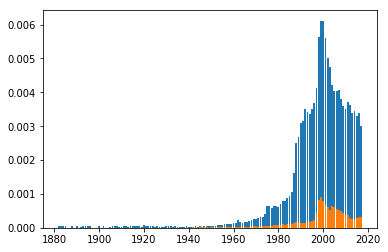

In [8]:
cam_M = cam_df[cam_df['sex'] == 'M']
cam_F = cam_df[cam_df['sex'] == 'F']
plt.bar(cam_M['year'], cam_M['prop'])
plt.bar(cam_F['year'], cam_F['prop'])

In [9]:
0.134661 / 0.013952

9.651734518348624

### 3. Gender Neutrality

    (a) What are the top 5 most gender neutral names?
    (b) What are the top 5 most gender neutral names that are predominately female names?
    (c) What are the top 5 most gender neutral names that are predominately male names?
    (d) What are the top 5 most predominately “female” names?
    (e) What are the top 5 most predominately “male” names?

In [10]:
top = pd.DataFrame(babys.groupby(['name'])['prop','n'].sum()).reset_index()
top_names = top[top['n'] > 50000]

# Create a list of all the names that have n > 50,000
names_list = list(top_names['name'])

# Use that list to get rows of original dataframe with only the values in the list
new_names = babys[babys['name'].isin(names_list)]
new_names.head()

# Perform a groupby
names_props = new_names.groupby(['name', 'sex'])['n', 'prop'].sum().reset_index()
names_props.head(6)

pd.to_numeric(names_props['prop'])

# Create dataframes spliting males and females
names_M = names_props[names_props['sex'] == 'M']
names_F = names_props[names_props['sex'] == 'F']

# Take the 'prop' columns of both dataframes and divide Males by Females to get a ratio.
total_prop = list(map(truediv, list(names_M['prop']), list(names_F['prop'])))

# Create a dataframe merging the list of names with their respective ratios
final_props = pd.DataFrame({'name': names_list, 'prop M/F': total_prop})

# Create column that takes the absolute value of the proportion - 1. This will give values closest to 1 when sorted.
final_props['abs'] = abs(final_props['prop M/F'] - 1)

#### 3(a) What are the top 5 most gender neutral names?

    1. Kerry
    2. Quinn
    3. Jackie
    4. Riley
    5. Leslie

In [11]:
final_props.sort_values(by=['abs'], ascending=True).head()

,name,prop M/F,abs
579,Kerry,0.956461,0.043539
803,Quinn,1.060819,0.060819
453,Jackie,0.929990,0.070010
829,Riley,1.114068,0.114068
618,Leslie,0.829574,0.170426


#### 3(b) What are the top 5 most gender neutral names that are predominately female names?

    1. Kerry
    2. Jackie
    3. Leslie
    4. Pat
    5. Frankie

In [12]:
female_neut = final_props[final_props['prop M/F'] < 1].sort_values(by=['prop M/F'], ascending = False).head()
female_neut

,name,prop M/F,abs
579,Kerry,0.956461,0.043539
453,Jackie,0.929990,0.070010
618,Leslie,0.829574,0.170426
781,Pat,0.825005,0.174995
357,Frankie,0.761089,0.238911


#### 3(c) What are the top 5 most gender neutral names that are predominately male names?

    1. Quinn
    2. Riley
    3. Jaime
    4. Casey
    5. Skyler

In [13]:
male_neut = final_props[final_props['prop M/F'] > 1].sort_values(by=['prop M/F']).head()
male_neut

,name,prop M/F,abs
803,Quinn,1.060819,0.060819
829,Riley,1.114068,0.114068
461,Jaime,1.231167,0.231167
171,Casey,1.446191,0.446191
896,Skyler,1.596557,0.596557


In [14]:
#final_props[final_props['prop M/F'] < 1].sort_values(by=['prop M/F'], ascending = False).head()

#### 3(d) What are the top 5 most predominately “female” names?

    1. Annabelle
    2. Isabelle
    3. Cecelia
    4. Mikayla
    5. Lilly

In [15]:
final_props.sort_values(by=['prop M/F'], ascending=True).head()

,name,prop M/F,abs
64,Annabelle,0.000122,0.999878
446,Isabelle,0.000124,0.999876
176,Cecelia,0.000155,0.999845
725,Mikayla,0.000195,0.999805
627,Lilly,0.000249,0.999751


#### 3(e) What are the top 5 most predominately “male” names?

    1. Edmund
    2. Jake
    3. Salvatore
    4. Grant
    5. Trenton

In [16]:
final_props.sort_values(by=['prop M/F'], ascending=False).head()

,name,prop M/F,abs
300,Edmund,1119.887944,1118.887944
462,Jake,751.227257,750.227257
861,Salvatore,729.709352,728.709352
397,Grant,715.816410,714.816410
952,Trenton,684.135750,683.135750


### 4. For this problem, choose either girls or boys. If you choose girls, use the five names that you found in problem (3b). If you choose boys, use the five names that you found in problem (3c). Plot the F/M ratio (or the M/F ratio) for the top names over time and use a different color for each name (you are only including lines for the top 5 names). Are there any names that changed female or male predominance at any time?

    - Since I did the M/F ratio, if the value is greater than 1, the name will be more male dominant. Looking at the plot, the name Riley originally was a highly male dominant name, but overtime that dominance decreased.
    
    A line was added across the plot at y=1, so the values below that line will be female dominant. It appears that over time, each name has crossed that line at least once. The name "Jaime" initially was male dominant, steadily become more female dominant and now is making its way back to being more male dominant. Jaime is the only name that is rising in male dominance, the other four names (Riley, Casey, Quinn, and Skyler) have all been decreasing.

In [17]:
# Create list of top 5 boy names
boy_list = list(male_neut['name'])

# Create data frame with just those names
boy_names_all = babys[babys['name'].isin(boy_list)]
boy_names_all

bna_M = boy_names_all[boy_names_all['sex'] == 'M']
bna_F = boy_names_all[boy_names_all['sex'] == 'F']
bna_total = pd.merge(bna_M, bna_F, on = ['year','name'], how='outer')


bna_total['M/F'] = bna_total['prop_x'] / bna_total['prop_y']
bna_total.head()

,year,sex_x,name,n_x,prop_x,sex_y,n_y,prop_y,M/F
0,1880,M,Riley,41,0.000346,NaN,NaN,NaN,NaN
1,1881,M,Riley,47,0.000434,NaN,NaN,NaN,NaN
2,1882,M,Riley,54,0.000443,NaN,NaN,NaN,NaN
3,1883,M,Riley,45,0.000400,NaN,NaN,NaN,NaN
4,1884,M,Riley,47,0.000383,NaN,NaN,NaN,NaN


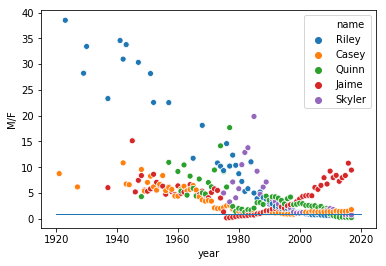

In [18]:
sns.scatterplot('year', 'M/F', data = bna_total, hue='name')
plt.plot([1920,2020],[1,1], linewidth=1)

## 5. Names by state

### 5(a) Choose at least 3 states. Compute the top 5 most gender neutral names as you did in problem (3) for each of the states that you chose. Restrict your analysis for each state to names that have at least 30,000 names (summed across both genders and all years) for that state.


In [19]:

# NC
nc_babys = pd.read_csv('namesbystate/NC.txt', names = ['state', 'sex', 'year', 'name', 'n'])
nc_babys['prop'] = nc_babys['n'] / sum(nc_babys['n'])
nc_babys_f = nc_babys[nc_babys['sex'] == 'F']
nc_babys_m = nc_babys[nc_babys['sex'] == 'M']

# Arizona
az_babys = pd.read_csv('namesbystate/AZ.txt', names = ['state', 'sex', 'year', 'name', 'n'])
az_babys['prop'] = az_babys['n'] / sum(az_babys['n'])

az_babys_f = az_babys[az_babys['sex'] == 'F']
az_babys_m = az_babys[az_babys['sex'] == 'M']

# Virginia
va_babys = pd.read_csv('namesbystate/VA.txt', names = ['state', 'sex', 'year', 'name', 'n'])
va_babys['prop'] = va_babys['n'] / sum(va_babys['n'])

va_babys_f = va_babys[va_babys['sex'] == 'F']
va_babys_m = va_babys[va_babys['sex'] == 'M']

In [20]:
def my_function(x):

    state_top = pd.DataFrame(x.groupby(['name'])['prop','n'].sum()).reset_index()
    state_top_names = state_top[state_top['n'] > 30000]

    # Create a list of all the names that have n > 30,000
    state_names_list = list(state_top_names['name'])

    # Use that list to get rows of original dataframe with only the values in the list
    state_new_names = x[x['name'].isin(state_names_list)]
    state_new_names.head()

    # Perform a groupby
    state_names_props = state_new_names.groupby(['name', 'sex'])['n', 'prop'].sum().reset_index()
    state_names_props.head(6)

    pd.to_numeric(state_names_props['prop'])

    # Create dataframes spliting males and females
    state_names_M = state_names_props[state_names_props['sex'] == 'M']
    state_names_F = state_names_props[state_names_props['sex'] == 'F']

    # Take the 'prop' columns of both dataframes and divide Males by Females to get a ratio.
    state_total_prop = list(map(truediv, list(state_names_M['prop']), list(state_names_F['prop'])))

    # Create a dataframe merging the list of names with their respective ratios
    state_final_props = pd.DataFrame({'name': state_names_list, 'prop M/F': state_total_prop})

    # Create column that takes the absolute value of the proportion - 1. This will give values closest to 1 when sorted.
    state_final_props['abs'] = abs(state_final_props['prop M/F'] - 1)
    
    return state_final_props

In [21]:
nc_final_props = my_function(nc_babys).sort_values(by=['abs']).head()
az_final_props = my_function(az_babys).sort_values(by=['abs']).head()
va_final_props = my_function(va_babys).sort_values(by=['abs']).head()

In [22]:
nc_final_props

,name,prop M/F,abs
22,Mary,0.004315,0.995685
0,Annie,0.004111,0.995889
2,Betty,0.003730,0.996270
9,Dorothy,0.001865,0.998135
13,Jennifer,0.001676,0.998324


In [23]:
az_final_props

,name,prop M/F,abs
3,Michael,226.290640,225.290640
0,David,959.325000,958.325000
4,Robert,1083.968750,1082.968750
1,James,1608.105263,1607.105263
2,John,1736.666667,1735.666667


In [24]:
va_final_props

,name,prop M/F,abs
14,Mary,0.002733,0.997267
8,Jennifer,0.001507,0.998493
12,Linda,0.000924,0.999076
0,Barbara,0.000744,0.999256
20,Sarah,0.000354,0.999646


### 5(b) How does your list of gender neutral names compare across the three states you chose and to the overall list from problem (3a)?

    - Calculating the top five most gender neutral names for individual states was a little more complicated for individual states. Since the data was subsetted to those whose total was greater than 30,000, the only names that had at least that many names were typically names that were really common for either sex. I created a function, using the same process as above to calculate the top 5 lists and found that there weren't any names that were particlarly gender neutral among the 3 states that I chose.

## Part 2

### Clean the data

In [25]:
import requests
import wikipedia
from bs4 import BeautifulSoup
import re

In [26]:
#Get the html source
html = wikipedia.page("List_of_United_States_cities_by_population").html().encode("UTF-8")
df = pd.read_html(html)[4]
df.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
df = pd.DataFrame(df)

In [27]:
df['City'] = df['City'].apply(lambda x: re.sub('\[.*\]', '', x))

In [28]:
df['Location'] = df['Location'].apply(lambda x: re.findall('\d+\.\d+', x))

In [29]:
def lat(x): 
    return [item[0] for item in x] 
def long(x):
    return [item[1] for item in x] 
df['lat'] = lat(df['Location'])
df['long'] = long(df['Location'])

df['lat'] = pd.to_numeric(df['lat'])
df['long'] = pd.to_numeric(df['long'])

In [30]:
# Clean the "Change" column to get rid of symbols. Add column if positive or negative.
df['Change'] = df['Change'].str.replace('â', '-')
df['Change'] = df["Change"].str.replace('%','')
df['Change'] = df["Change"].str.replace('+','')
df['Change'] = df['Change'].apply(lambda x: re.sub('\[.*\]', '', x))
df['Change'] = pd.to_numeric(df['Change'])

In [31]:
df['mag'] = np.where(df['Change']>=0, 'Positive', 'Negative')

### 6(a) Make a plot of the data using longitude on the x-axis and latitude on the y-axis. Size the points based on the magnitude of the percent change. Color the points based on whether the percent change is positive or negative.

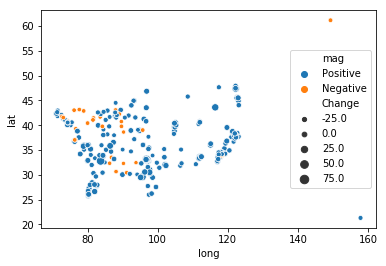

In [32]:
sns.scatterplot(x = 'long', y = 'lat', hue = 'mag', data = df, size = 'Change')

### 6(b) Repeat the same plot excluding cities from Alaska and Hawaii (so that the ranges for longitude and latitude are not so big).

In [33]:
# Subset original dataset, removing rows where the state is Alaska and Hawaii
df2 = df[~df['State[c]'].isin(['Alaska', 'Hawaii'])]

(25, 60)

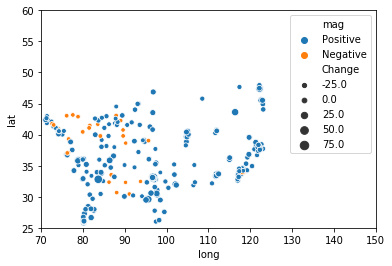

In [34]:
# Change range of axes to better fit the legend
sns.scatterplot(x = 'long', y = 'lat', hue = 'mag', data = df2, size = 'Change')
plt.xlim(70, 150)
plt.ylim(25, 60)

### 6(c) Comment on any patterns that you see.

    - Overall, there appears to be on average, a more positive change across the United States. However, it looks like the states in the Midwest/Northeast/East coast tend to be more negative than those on the West. In general, the largest growth appears to be in Texas and California, but there is also a major increase in what looks like Georgia. By observing the data, not just looking at the graph, these assumptions were correct!

In [121]:
df.head()

,2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location,lat,long,mag
0,1,New York,New York,8398748,8175133,2.74,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2","[40.6635, 73.9387]",40.6635,73.9387,Positive
1,2,Los Angeles,California,3990456,3792621,5.22,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2","[34.0194, 118.4108]",34.0194,118.4108,Positive
2,3,Chicago,Illinois,2705994,2695598,0.39,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2","[41.8376, 87.6818]",41.8376,87.6818,Positive
3,4,Houston,Texas,2325502,2100263,10.72,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2","[29.7866, 95.3909]",29.7866,95.3909,Positive
4,5,Phoenix,Arizona,1660272,1445632,14.85,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2","[33.5722, 112.0901]",33.5722,112.0901,Positive


## 7. Crime Rates

### Clean the data

In [111]:
#Get the html source
html2 = wikipedia.page("List_of_United_States_cities_by_crime_rate").html().encode("UTF-8")
crime = pd.read_html(html2)[0]
crime.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
crime = pd.DataFrame(crime)
crime.columns = crime.columns.droplevel()

#Get the html source
html3 = wikipedia.page("United_States_cities_by_crime_rate_(100,000–250,000)").html().encode("UTF-8")
crime2 = pd.read_html(html3)[1]
crime2.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
crime2 = pd.DataFrame(crime2)

In [116]:
crime_city = list(crime['City'])
crime2_city = list(crime2['City'])

# Remove the numbers from the city names
def remove_nums(list): 
    remove_digits = str.maketrans('', '', digits) 
    list = [i.translate(remove_digits) for i in list] 
    return list

crime_city = remove_nums(crime_city)
crime2_city = remove_nums(crime2_city)

In [138]:
# Create dataframe with city and population columns from original data. Merge it on 'City' with the new crime data

crime_merged = pd.merge(crime, crime2, on = 'City', how='inner')
cit_pop = df[['City','2016 population density']]
pop_merged = pd.merge(crime_merged, cit_pop, on='City', how='inner')
pop_merged

pop_merged['2016 population density'] = pop_merged['2016 population density'].str[:-6]
pop_merged['2016 population density'] = pop_merged['2016 population density'].str.replace(',','')
pop_merged['2016 population density'] = pd.to_numeric(pop_merged['2016 population density'])
pop_merged.head()

,State_x,City,Population_x,Total,Murder and Nonnegligent manslaughter,Rape1,Robbery_x,Aggravated assault_x,Total,Burglary_x,...,Violent Crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery_y,Aggravated assault_y,Property crime,Burglary_y,Larceny-theft_y,Motor vehicle theft_y,2016 population density
0,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,...,258.7,1.6,26.4,61.4,169.3,2707.2,472.6,2129.2,105.5,3813
1,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,...,95.7,2.3,8.9,27.5,56.9,1580.3,338.8,1164.9,76.5,3487
2,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,...,491.4,5.2,23.2,177.3,285.8,6409.5,1221.9,4662.3,525.3,4161
3,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,...,491.4,5.2,23.2,177.3,285.8,6409.5,1221.9,4662.3,525.3,6606
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,...,119.5,-,3.1,55.4,61.1,1561.3,264.7,1138.0,158.5,4161


### Make a scatterplot

    - By observing the scatterplot with regression lines on a facet grid, we can observe that there is not much of a relationship between population density and crime rates. This is observable by the somewhat flat regression line and large confidence interval.
    
    - By computing correlation coefficients, we obtain values of -0.20 (population density ~ Violent crime) and a    -0.13 (population density ~ Property crime). These numbers suggest that there is a negative relationship (as one increases, the other decreases), but since the number is somewhat close to zero, it does not have a very large relationship.

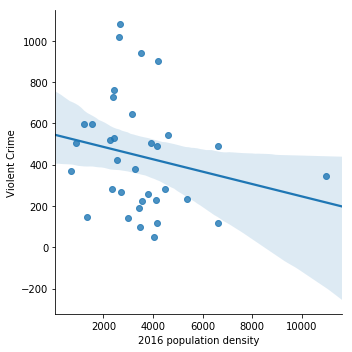

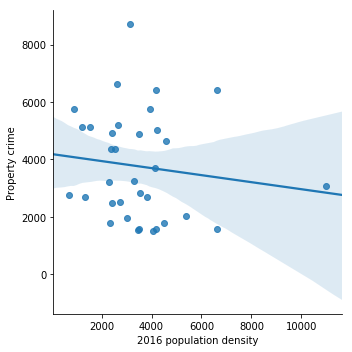

In [145]:
sns.lmplot(x='2016 population density', y='Violent Crime', data = pop_merged)
sns.lmplot(x='2016 population density', y='Property crime', data = pop_merged)

In [147]:
print(pop_merged['2016 population density'].corr(pop_merged['Violent Crime']))
print(pop_merged['2016 population density'].corr(pop_merged['Property crime']))

-0.2089127537570482
-0.12711262636638643


## Part 3